# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

> 
> 

> 
> 





In [84]:
import re
import pandas as pd
from functools import reduce
import jieba
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from icecream import ic
import random

In [27]:
path = '/localdisk/pinga/lzy/NLP-class-data/sqlResult_1558435.csv'
dataframe = pd.read_csv(path,encoding='gb18030')

In [28]:
all_articles = dataframe['content'].tolist()

In [29]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [31]:
all_articles = [token(str(s)) for s in all_articles]

In [34]:
TEXT = ''
for a in all_articles:
    TEXT += a

In [43]:
def cut(string):return list(jieba.cut(string))
ALL_TOKENS = cut(TEXT)
valida_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']
len(valida_tokens)

17221785

In [46]:
words_count = Counter(valida_tokens)

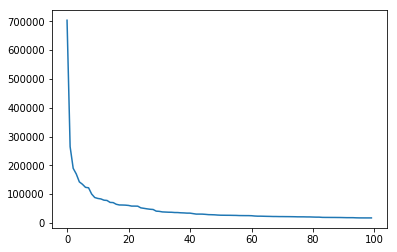

In [50]:
frequences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(len(frequences[0:100]))]
plt.plot(x,frequences)

In [52]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)

In [55]:
def get_prob(word):
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return 1 / frequences_sum

In [57]:
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

In [61]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [62]:
sentences = """
这是一个比较正常的句子
这个一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()


for s in sentences:
    print(s, language_model_one_gram(s))

这是一个比较正常的句子 7.429984647015532e-22
这个一个比较罕见的句子 1.7566783516469408e-22
小明毕业于清华大学 3.039960976514903e-18
小明毕业于秦华大学 5.813337476916057e-24


In [63]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


## 2-Gram

In [66]:
valid_tokens = [str(t) for t in valida_tokens]
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [68]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter:return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum

In [72]:
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [78]:
def language_model_of_2_gram(sentence):
    sentence_probability = 1
    words = cut(sentence)
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    return sentence_probability

In [82]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_of_2_gram(s1), language_model_of_2_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 6.82225584071837e-14
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


In [87]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [88]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [90]:
g = parse_grammar(grammar)
random_generated = [gene(g) for _ in range(100)]
sorted(random_generated, key=language_model_of_2_gram, reverse=True)


['这个女人的尾巴看着这个女人的裙子',
 '一个篮球的尾巴看见这个女人的眼睛',
 '这个篮球的裙子看着这个桌子的眼睛',
 '一个桌子的尾巴看见这个桌子的胳膊',
 '这个桌子的眼睛坐在这个女人的胳膊',
 '一个女人的尾巴听着一个小小的女人的眼睛',
 '一个小猫的眼睛看见这个篮球的眼睛',
 '这个桌子的胳膊看见这个桌子的尾巴',
 '这个篮球的胳膊坐在一个桌子的眼睛',
 '这个小小的小猫的裙子看着一个女人的眼睛',
 '这个小猫的眼睛坐在这个女人的裙子',
 '一个桌子的眼睛看见一个桌子的裙子',
 '这个小猫的裙子听着一个女人的尾巴',
 '一个篮球的裙子看着一个桌子的眼睛',
 '一个小猫的尾巴坐在一个小小的女人的胳膊',
 '一个篮球的胳膊看见这个小猫的裙子',
 '一个桌子的眼睛坐在一个篮球的胳膊',
 '一个小猫的尾巴看着一个桌子的胳膊',
 '一个篮球的裙子看着这个篮球的裙子',
 '这个女人的胳膊坐在一个小小的篮球的尾巴',
 '一个篮球的尾巴看见这个篮球的尾巴',
 '一个小猫的裙子看着一个小猫的尾巴',
 '一个篮球的尾巴看着这个小小的桌子的裙子',
 '这个桌子的眼睛看着一个篮球的尾巴',
 '一个篮球的尾巴听着这个女人的裙子',
 '一个篮球的眼睛听着一个篮球的眼睛',
 '这个篮球的尾巴听着这个篮球的眼睛',
 '这个小小的桌子的眼睛看着一个桌子的裙子',
 '这个好看的小猫的裙子看见一个女人的眼睛',
 '这个桌子的尾巴听着一个小小的小小的女人的眼睛',
 '一个好看的小猫的裙子看见这个女人的胳膊',
 '这个好看的女人的裙子坐在这个女人的胳膊',
 '一个好看的桌子的眼睛看见这个桌子的眼睛',
 '这个女人的尾巴看着一个好看的桌子的眼睛',
 '一个蓝色的女人的眼睛看见这个篮球的胳膊',
 '这个好看的女人的眼睛听着一个女人的裙子',
 '一个好看的小猫的裙子看着这个小猫的尾巴',
 '一个好看的桌子的裙子看见一个篮球的眼睛',
 '这个小小的小小的篮球的裙子坐在这个篮球的胳膊',
 '一个好看的篮球的眼睛看着这个小猫的裙子',
 '这个小小的女人的胳膊看着这个蓝色的小猫的胳膊',
 '一个小小的女人的尾巴看着这个蓝色的桌子的胳膊',
 '一个篮球的胳膊看见这个蓝色的小猫的裙子',
 '这个篮球的裙子听着一个好看的女人的胳膊'

## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

Ans:  
下载：git clone +网址  
上传：先git add  再git commit 最后 git push  
Jupyter 交互式编程，便于学习和教学  
Pycharm IDE,用于开发

##### 2. What's the Probability Model?

Ans:  
在对事物的判断基于概率

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:   
信用卡违约风险预测  
CTR预估    
情感识别  

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


Ans:  
使用probability是为了能够应对未定义模式语句的出现，能够应对变化，降低过拟合。  
基于parsing和Pattern的方法太过于依赖语言学家对于语句规则的制定，容易过拟合。

##### 5. What's the Language Model;

Ans:  
计算一个句子生成的概率的模型

#####  6. Can you came up with some sceneraies at which we could use Language Model?

Ans:  
语音识别  
机器翻译  

##### 7. What's the 1-gram language model;

Ans:  
每个gram之间相互独立

##### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:  
优点：简化模型，方便计算  
缺点：过于简化，忽略了真实情况，欠拟合。

##### 9.  What't the 2-gram models; 

Ans:  
每个gram之间不再相互独立，每个gram的概率为依赖于另一个gram的条件概率

##### 10. what's the web crawler, and can you implement a simple crawler? 

Ans:  
爬虫 即为通过编写程序自动获取网页上的信息

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

Ans:  
难点：需要补充部分前端知识  
同时也要对计算机网络中的部分协议有所了解  

##### 12. What't the Regular Expression and how to use?

Ans:  
RE：以某种规则完成对文本的匹配，搜索等一系列操作  
python中通过导入re进行使用

## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor

Step 3: Using the technologies and methods to finish the language model; 
> 

Step 4: Try some interested sentence pairs, and check if your model could fit them

> 

Step 5: If we need to solve following problems, how can language model help us? 

+ Voice Recognization.
+ Sogou *pinyin* input.
+ Auto correction in search engine. 
+ Abnormal Detection.

### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

Ans:  
优势：与先前的方法相比相当于放宽了模型的限制，扩大了模型的适用范围。  
缺点： 需要一定的先验知识，要对样本概率分布有一定的假设，当假设不正确时，模型失效。

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

Ans: 

Then, the sencond question is: 

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37

> coding in here